In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import backend as K

Using TensorFlow backend.


Text(0.5, 1.0, 'User Preferences')

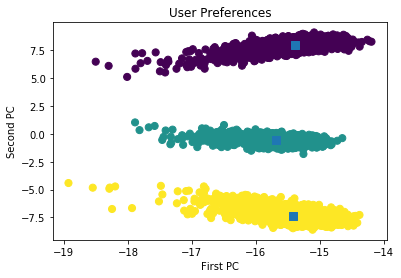

In [50]:
# May need to change path names as necessary
user_preference = pd.read_csv("../data_files/user_history.csv")
user_ratings = pd.read_csv("../data_files/user_ratings.csv")
data = user_preference.drop('USER ID', axis=1).values

# Plotting the objective value for clustering on fancy data with different values for k
from sklearn.cluster import KMeans
# print(data)
# objective = []
# for k in range(1,11):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(user_preference)
#     objective.append(kmeans.inertia_)
# plt.plot([i for i in range(1,11)],objective)
# plt.xlabel('Clusters')
# plt.ylabel('Inertia')
# plt.title('Cluster Errors')

# Performing KMeans on preference_data
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
y_kmeans = kmeans.predict(data)

# Using first two principal components to make scatter plot of centroids and clusters
U, S, VT = np.linalg.svd(data.T)
# print(S)

fancy_data_pcbasis = U.T @ data.T
clusters_pcbasis = U.T @ kmeans.cluster_centers_.T

plt.scatter(fancy_data_pcbasis[0], fancy_data_pcbasis[1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(clusters_pcbasis[0], clusters_pcbasis[1], s=80, marker='s')
plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.title('User Preferences')

In [3]:
# THIS IS WHERE YOU PICK WHICH GROUP TO TRAIN ON
# CHANGE THE y_kmeans==[0,1,2] to select a group
# The group whose first USER ID is 100965 is the one that works with low error

group = user_preference.iloc[y_kmeans==1]
# group
# y_kmeans
# kmeans.predict(group.drop('USER ID', axis=1))
# user_ratings

In [4]:
# Doing PCA
data = group.drop('USER ID', axis=1).values
U, S, VT = np.linalg.svd(data.T)
group_pca = U.T @ data.T

In [5]:
# Adding columns to group data
group['pca_1'] = group_pca[0]
group['pca_2'] = group_pca[1]
group['pca_3'] = group_pca[2]
group['pca_4'] = group_pca[3]
group['pca_5'] = group_pca[4]
group['pca_6'] = group_pca[5]
group['pca_7'] = group_pca[6]
group['pca_8'] = group_pca[7]
group['pca_9'] = group_pca[8]
group['pca_10'] = group_pca[9]

/Users/jordanprudhomme/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/jordanprudhomme/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jordanprudhomme/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [6]:
# This is to remove all the 100 website data features
group_reduced = group[['USER ID', 'pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6', 'pca_7', 'pca_8', 'pca_9', 'pca_10']].set_index('USER ID')

In [7]:
# Isolating the ratings that correspond with group in the user_ratings and then adding in the user pca to each rating
# May need to change path name as necessary
data = pd.read_csv("../data_files/user_ratings.csv", index_col='USER ID')
ratings = data.loc[group_reduced.index].dropna()

full = group_reduced.loc[ratings.index]

all_data = pd.concat([ratings,full], axis=1)
all_data.loc[all_data['PRODUCT'] == 'spray karma']
all_data

/Users/jordanprudhomme/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until


,PRODUCT,RATING,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10
USER ID,,,,,,,,,,,,
100953,spray karma,3.0,-17.749382,1.305383,-2.802925,-0.440539,-0.380927,0.055205,-0.190773,-0.198851,0.054722,-0.031179
100953,nurse october,5.0,-17.749382,1.305383,-2.802925,-0.440539,-0.380927,0.055205,-0.190773,-0.198851,0.054722,-0.031179
100953,balance hostel,3.0,-17.749382,1.305383,-2.802925,-0.440539,-0.380927,0.055205,-0.190773,-0.198851,0.054722,-0.031179
100953,volume pasta,3.0,-17.749382,1.305383,-2.802925,-0.440539,-0.380927,0.055205,-0.190773,-0.198851,0.054722,-0.031179
100953,diana chariot,6.0,-17.749382,1.305383,-2.802925,-0.440539,-0.380927,0.055205,-0.190773,-0.198851,0.054722,-0.031179
...,...,...,...,...,...,...,...,...,...,...,...,...
117510,tunnel nerve,6.0,-17.436581,3.815354,-0.933146,0.114185,0.644100,-0.105815,0.497331,-0.135266,-0.243937,0.059157
117510,serial organic,10.0,-17.436581,3.815354,-0.933146,0.114185,0.644100,-0.105815,0.497331,-0.135266,-0.243937,0.059157
117510,reverse royal,1.0,-17.436581,3.815354,-0.933146,0.114185,0.644100,-0.105815,0.497331,-0.135266,-0.243937,0.059157


In [8]:
# One hotting product names
dummies = pd.get_dummies(all_data['PRODUCT']) 
all_data = pd.concat([all_data,dummies], axis=1)
# np.mean(all_data.loc[all_data['PRODUCT'] == 'spray karma']['RATING'])

In [9]:
# Separate into training and test data
from sklearn.model_selection import train_test_split

train, test = train_test_split(all_data, test_size=0.30)
x_train = train.drop(['RATING','PRODUCT'], axis=1)
y_train = train['RATING']
x_test = test.drop(['RATING','PRODUCT'], axis=1)
y_test = test['RATING']

In [10]:
# Normalize
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [11]:
# Set up needed parameters and activation for NN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import optimizers

batch_size = 25
epochs=10

def custom_activation(x):
    return (K.sigmoid(x) * 10)

In [12]:
# Make, compile, and train model
model = Sequential()
model.add(Dense(150, activation='sigmoid',
                 input_shape=(110,)))
model.add(Dense(1, activation=custom_activation))
model.compile(
              loss='mean_absolute_error',
                optimizer='adam')
#                 optimizer = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True))

model.summary()
model.fit(x_train, y_train.values, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test.values))
model.evaluate(x_test, y_test.values)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 150)               16650     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total params: 16,801
Trainable params: 16,801
Non-trainable params: 0
_________________________________________________________________
Train on 35312 samples, validate on 15135 samples
Epoch 1/5
35312/35312 [==============================] - 8s 239us/sample - loss: 2.3333 - val_loss: 2.3425
Epoch 2/5
35312/35312 [==============================] - 7s 194us/sample - loss: 2.3174 - val_loss: 2.3200
Epoch 3/5
35312/35312 [==============================] - 10s 284us/sample - loss: 2.3088 - val_loss: 2.3308
Epoch 4/5
35312/35312 [==============================] - 10s 

2.3181832248005962

# Making Predictions

In [62]:
# Make dataframe of all users in group and products
products = user_ratings['PRODUCT'].unique()
users = group['USER ID'].values
matches = []
for user in users:
    for product in products:
        matches.append([user, product])
matches

final_data = pd.DataFrame(matches, columns=['USER ID', 'PRODUCT'])

In [63]:
# Add in user features
users = group_reduced.loc[final_data['USER ID']].reset_index(drop=True)
all_final_data = pd.concat([final_data,users], axis=1)
all_final_data

,USER ID,PRODUCT,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10
0,100953,spray karma,-17.749382,1.305383,-2.802925,-0.440539,-0.380927,0.055205,-0.190773,-0.198851,0.054722,-0.031179
1,100953,nurse october,-17.749382,1.305383,-2.802925,-0.440539,-0.380927,0.055205,-0.190773,-0.198851,0.054722,-0.031179
2,100953,balance hostel,-17.749382,1.305383,-2.802925,-0.440539,-0.380927,0.055205,-0.190773,-0.198851,0.054722,-0.031179
3,100953,volume pasta,-17.749382,1.305383,-2.802925,-0.440539,-0.380927,0.055205,-0.190773,-0.198851,0.054722,-0.031179
4,100953,diana chariot,-17.749382,1.305383,-2.802925,-0.440539,-0.380927,0.055205,-0.190773,-0.198851,0.054722,-0.031179
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,125976,tarzan juliet,-17.110314,1.719239,-1.475904,-0.555906,0.221060,0.273608,0.002532,0.007201,0.078600,-0.019496
149996,125976,provide flex,-17.110314,1.719239,-1.475904,-0.555906,0.221060,0.273608,0.002532,0.007201,0.078600,-0.019496
149997,125976,update vibrate,-17.110314,1.719239,-1.475904,-0.555906,0.221060,0.273608,0.002532,0.007201,0.078600,-0.019496
149998,125976,neptune before,-17.110314,1.719239,-1.475904,-0.555906,0.221060,0.273608,0.002532,0.007201,0.078600,-0.019496


In [64]:
# Make predictions
predicting = all_final_data.drop(['USER ID'], axis=1)
dummies = pd.get_dummies(predicting['PRODUCT']) 
predicting = pd.concat([predicting,dummies], axis=1).drop(['PRODUCT'], axis=1)

raw_vals = scaler.fit_transform(predicting) 
pred = model.predict(raw_vals)

In [65]:
all_final_data['RATING'] = pred
all_final_data

,USER ID,PRODUCT,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,RATING
0,100953,spray karma,-17.749382,1.305383,-2.802925,-0.440539,-0.380927,0.055205,-0.190773,-0.198851,0.054722,-0.031179,5.068238
1,100953,nurse october,-17.749382,1.305383,-2.802925,-0.440539,-0.380927,0.055205,-0.190773,-0.198851,0.054722,-0.031179,4.494606
2,100953,balance hostel,-17.749382,1.305383,-2.802925,-0.440539,-0.380927,0.055205,-0.190773,-0.198851,0.054722,-0.031179,4.545209
3,100953,volume pasta,-17.749382,1.305383,-2.802925,-0.440539,-0.380927,0.055205,-0.190773,-0.198851,0.054722,-0.031179,4.916543
4,100953,diana chariot,-17.749382,1.305383,-2.802925,-0.440539,-0.380927,0.055205,-0.190773,-0.198851,0.054722,-0.031179,5.228271
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,125976,tarzan juliet,-17.110314,1.719239,-1.475904,-0.555906,0.221060,0.273608,0.002532,0.007201,0.078600,-0.019496,4.693094
149996,125976,provide flex,-17.110314,1.719239,-1.475904,-0.555906,0.221060,0.273608,0.002532,0.007201,0.078600,-0.019496,4.908367
149997,125976,update vibrate,-17.110314,1.719239,-1.475904,-0.555906,0.221060,0.273608,0.002532,0.007201,0.078600,-0.019496,4.693336
149998,125976,neptune before,-17.110314,1.719239,-1.475904,-0.555906,0.221060,0.273608,0.002532,0.007201,0.078600,-0.019496,4.511647


In [66]:
results = all_final_data[['USER ID', 'PRODUCT', 'RATING']]
results

,USER ID,PRODUCT,RATING
0,100953,spray karma,5.068238
1,100953,nurse october,4.494606
2,100953,balance hostel,4.545209
3,100953,volume pasta,4.916543
4,100953,diana chariot,5.228271
...,...,...,...
149995,125976,tarzan juliet,4.693094
149996,125976,provide flex,4.908367
149997,125976,update vibrate,4.693336
149998,125976,neptune before,4.511647


In [71]:
# Adding in know ratings from data set (extremely slow)
for index, row in all_data.iterrows():
#     print(results[(results['USER ID'] == row.name)  & (results['PRODUCT'] == row['PRODUCT'])]['RATING'])
    results.at[(results['USER ID'] == row.name)  & (results['PRODUCT'] == row['PRODUCT']), 'RATING'] = row['RATING']
results

/Users/jordanprudhomme/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,USER ID,PRODUCT,RATING
0,100953,spray karma,3.000000
1,100953,nurse october,5.000000
2,100953,balance hostel,3.000000
3,100953,volume pasta,3.000000
4,100953,diana chariot,6.000000
...,...,...,...
149995,125976,tarzan juliet,4.693094
149996,125976,provide flex,4.908367
149997,125976,update vibrate,4.693336
149998,125976,neptune before,4.511647


# Making Final Output File

In [27]:
# If predicting for highly accurate group, use this ti create csv
results.to_csv('predictions_group_1.csv',index=False)

In [72]:
# If appending less accurate groups to csv, use this code
results.to_csv('all_predictions.csv', mode='a', index=False, header=False)

# EVERYTHING BELOW IS FROM DEBBUGING AND TESTING


In [ ]:
# user_ratings[(user_ratings['USER ID'] == 100976)]

In [ ]:
# import numpy as np
# from sklearn import linear_model

# ridge_model = linear_model.RidgeCV()
# ridge_model.fit(x_train, y_train)

# np.mean((ridge_model.predict(x_test) - y_test)**2)

In [ ]:
# all_data

In [ ]:
# results[(all_data.index == 100953)]